In [1]:
import import_ipynb
from YFinance_Load_Data import *

importing Jupyter notebook from YFinance_Load_Data.ipynb
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed



# Challenge

### Plot the Candles for the Time Period of Sep 2019 - Dec 2019

In [11]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

In [24]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%%**********************]  2 of 2 completed


In [25]:
raw

Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.487534   87.483192   7.643214  113.330002   7.660714   
2010-01-05   6.498749   87.714760   7.656429  113.629997   7.699643   
2010-01-06   6.395378   87.776527   7.534643  113.709999   7.686786   
2010-01-07   6.383555   88.147087   7.520714  114.190002   7.571429   
2010-01-08   6.425994   88.440384   7.570714  114.570000   7.571429   
...               ...         ...        ...         ...        ...   
2019-12-23  69.261589  302.854034  71.000000  321.220001  71.062500   
2019-12-24  69.327431  302.863403  71.067497  321.230011  71.222504   
2019-12-26  70.702927  304.475586  72.477501  322.940002  72.495003   
2019-12-27  70.676109  304.400177  72.449997  322.859985  73.492500   
2019-12-30  71.095558  302.721954  72.879997  321.079987  73.172501   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2010-01-04  113.389999   7.585000  111.510002   7.622500  112.370003   
2010-01-05  113.680000   7.616071  112.849998   7.664286  113.260002   
2010-01-06  113.989998   7.526786  113.430000   7.656429  113.519997   
2010-01-07  114.330002   7.466071  113.180000   7.562500  113.500000   
2010-01-08  114.620003   7.466429  113.660004   7.510714  113.889999   
...                ...        ...         ...        ...         ...   
2019-12-23  321.649994  70.092499  321.059998  70.132500  321.589996   
2019-12-24  321.519989  70.730003  320.899994  71.172501  321.470001   
2019-12-26  322.950012  71.175003  321.640015  71.205002  321.649994   
2019-12-27  323.799988  72.029999  322.279999  72.779999  323.739990   
2019-12-30  323.100006  71.305000  320.549988  72.364998  322.950012   

               Volume             
                 AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2019-12-23   98572000   52990000  
2019-12-24   48478800   20270000  
2019-12-26   93121200   30911200  
2019-12-27  146266000   42528800  
2019-12-30  144114400   49729100  

[2515 rows x 12 columns]

,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,51.607498,51.744999,51.055000,51.424999
2019-09-04,52.097500,52.369999,51.830002,52.297501
2019-09-05,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-26,71.205002,72.495003,71.175003,72.477501
2019-12-27,72.779999,73.492500,72.029999,72.449997
2019-12-28,NaN,NaN,NaN,NaN


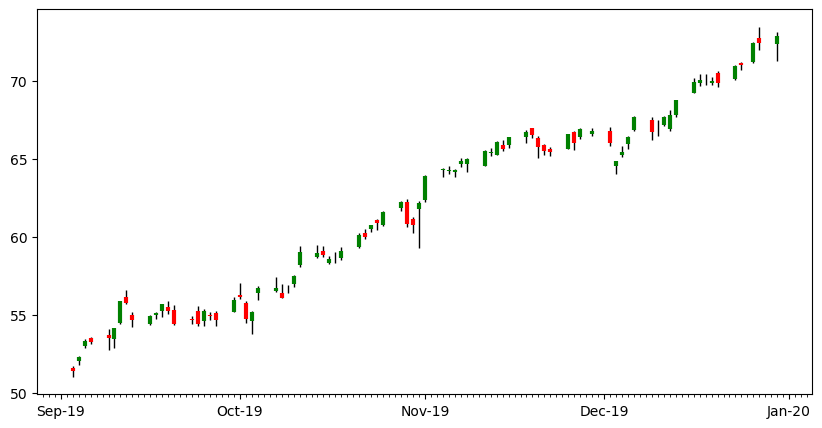

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

def plot_candle(df, ax):
    #wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    #red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    #green - increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors = 'g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(raw
.iloc[:,::2]
 .pipe(fix_cols)
 .resample('d')
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close':'last'})
 .loc['sep 2019': 'dec 2019']
 .pipe(plot_candle,ax)
)